# Exercise 005

<a href="https://colab.research.google.com/github/FAIRChemistry/PythonProgrammingBio24/blob/main/solutions/Exercise005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Please execute this cell to download the necessary data
!wget https://github.com/JR-1991/PythonProgrammingBio24/raw/main/data/gc_len_data.csv

In [ ]:
# Please execute this cell to install the necessary packages
!pip install seaborn matplotlib pandas numpy scikit-learn

## Data Clustering #1

Read in the data `gc_len_data.csv` using Pandas, perform KMeans clustering, visualize the result with a suitable plot, and compare it to the original data.

What do you notice? Was the data clustered correctly?

**Tips**

> * To visualize the data, you may want to use a dimensionality reduction method, such as the Principal Component Analysis, to confirm the clustering result visually. Check the Sciki-Learn's documentation for guidance on implementing your own method. If you're having trouble, you can use the implementation from the previous exercise, available [here](https://jr-1991.github.io/PythonProgrammingBio24/solutions/Exercise004/).
> * This dataset consists of various data types, but the clustering method only works with numeric data. Use the `filter` method to narrow down the dataset to columns that are compatible with the algorithm.

In [59]:
# First, import the necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [75]:
# Let's re-use the PCA function from last time
def pca(data: pd.DataFrame) -> pd.DataFrame:
    """Takes a DataFrame and calculates the first two principle components

    Args:
        data (pd.DataFrame): The data used to gather the PCs

    Returns:
        pd.DataFrame: The resulting PCA data
    """

    scaler = MinMaxScaler()
    data = scaler.fit_transform(data.select_dtypes(include='number'))

    pcs = PCA(n_components=2).fit_transform(data)

    return pd.DataFrame(
        {"PC1": pcs[:, 0], "PC2": pcs[:, 1]}
    )

def plot_results(data: pd.DataFrame, y_true: list, y_pred: list):
    """Plots both the cluster results and true labels

    Args:
      data (pd.DataFrame): The data used to gather the PCs
      y_true (list): List of the true labels
      y_pred (list): List of the predicted labels
    """

    assert len(y_true) == data.shape[0]
    assert len(y_pred) == data.shape[0]

    # Get PCs and init plot
    df_pc = pca(data)
    f, ax = plt.subplots(1, 2, figsize=(12,5))

    # Add labels to the DataFrame
    df_pc["y_true"] = y_true
    df_pc["y_pred"] = y_pred

    sns.scatterplot(data=df_pc, x="PC1", y="PC2", hue="y_true", ax=ax[0])
    sns.scatterplot(data=df_pc, x="PC1", y="PC2", hue="y_pred", ax=ax[1])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


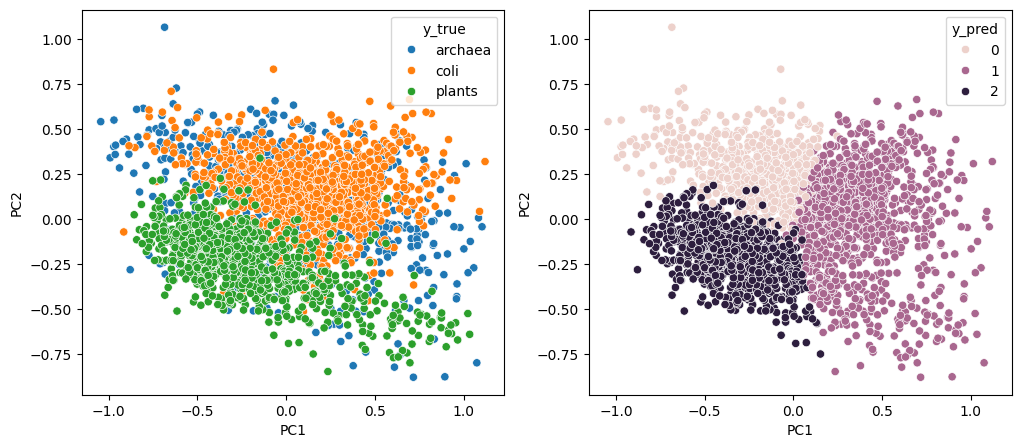

In [76]:
# Load the dataset
df = pd.read_csv("./gc_len_data.csv")

# Filter the dataset to obtain the numerical columns only
df_numeric = df.select_dtypes(include='number')

# Initialize the KMeans cluster type
kmeans = KMeans(
    n_clusters=3, # We expect three classes
    random_state=1 # Same seed for reproducibility
)

# Min max scale the data
data = MinMaxScaler().fit_transform(df_numeric.values)

# Pass the data to KMeans, fit it and receive the labels
kmeans.fit(data)

# Plot it!
plot_results(
    data=df_numeric,
    y_true=df["organism"],
    y_pred=kmeans.predict(data)
)

## Data Clustering #2

KMeans is a powerful algorithm for detecting clusters, but it requires prior knowledge and assumes linear decision boundaries. Determining the appropriate number of 'classes' in your dataset can be challenging. Review SciKit-Learn's [documentation](https://scikit-learn.org/stable/modules/clustering.html) on clustering algorithms and try out at least one or two of them to repeat the previous task.

How do they perform? Which one do you prefer and why?

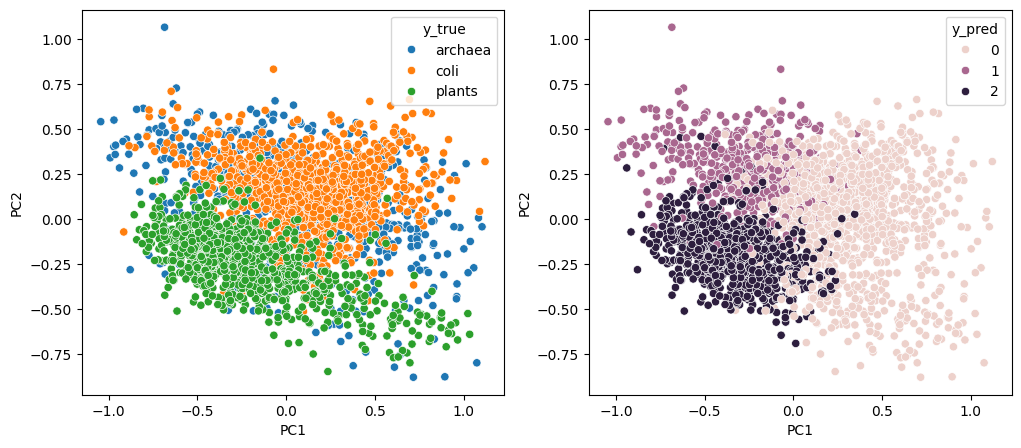

In [79]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative clustering is an algorithm commonly used
# in the analysis of microarray data and very powerful!

agglo = AgglomerativeClustering(n_clusters=3)
labels = agglo.fit_predict(data)

# Plot it!
plot_results(
    data=df_numeric,
    y_true=df["organism"],
    y_pred=labels
)

## Implementing KMeans

Your task is to implement the kmeans function using the provided helper functions. The kmeans function should take the input data points, the number of clusters, the maximum number of iterations, and the tolerance for convergence as arguments. It should return the final centroids and the labels assigned to each data point. The implementation is outlined as follows:

1. Initialize centroids

    * Use the `initialize_centroids` function to randomly select initial centroids from the data points.

2. Iterate until convergence or maximum iterations:

    * In each iteration
        * Assign labels to each data point based on the nearest centroid using the assign_labels function.
        * Compute new centroids as the mean of all points assigned to each cluster using the compute_centroids function.
        * Check for convergence using the has_converged function.
        * If converged, break the loop.

3. Return results:
    * Return the final centroids and the labels assigned to each data point.

### Helper functions

Execute the following cell to make use of the helper functions.

In [80]:
import numpy as np

def initialize_centroids(X, n_clusters):
    """
    Randomly initialize centroids from the data points.

    Args:
        X (numpy.ndarray): The input data points.
        n_clusters (int): The number of clusters.

    Returns:
        numpy.ndarray: The initialized centroids.
    """
    np.random.seed(42)
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:n_clusters]]
    return centroids

def assign_labels(X, centroids):
    """
    Assign labels to each data point based on the nearest centroid.

    Args:
        X (numpy.ndarray): The input data points.
        centroids (numpy.ndarray): The current centroids.

    Returns:
        numpy.ndarray: The labels assigned to each data point.
    """
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    return labels

def compute_centroids(X, labels, n_clusters):
    """
    Compute new centroids as the mean of all points assigned to each cluster.

    Args:
        X (numpy.ndarray): The input data points.
        labels (numpy.ndarray): The labels assigned to each data point.
        n_clusters (int): The number of clusters.

    Returns:
        numpy.ndarray: The new centroids.
    """
    centroids = np.zeros((n_clusters, X.shape[1]))
    for k in range(n_clusters):
        cluster_points = X[labels == k]
        if len(cluster_points) > 0:
            centroids[k] = np.mean(cluster_points, axis=0)
    return centroids

def has_converged(old_centroids, new_centroids, tol):
    """
    Check if the centroids have converged.

    Args:
        old_centroids (numpy.ndarray): The old centroids.
        new_centroids (numpy.ndarray): The new centroids.
        tol (float): The tolerance for convergence.

    Returns:
        bool: True if the centroids have converged, False otherwise.
    """
    return np.all(np.abs(old_centroids - new_centroids) < tol)

In [89]:
def kmeans(df, n_clusters=3, max_iter=300, tol=1e-4):
    """
    Apply the KMeans clustering algorithm.

    Args:
        X (numpy.ndarray): The input data points.
        n_clusters (int): The number of clusters.
        max_iter (int): The maximum number of iterations.
        tol (float): The tolerance for convergence.

    Returns:
        tuple: The final centroids and the labels assigned to each data point.
    """

    # Leave this to convert the DataFrame to NumPy
    X = df.select_dtypes(include='number').values

    # MinMax-Scale the data
    X = MinMaxScaler().fit_transform(X)

    # Initialize centroids
    centroids = initialize_centroids(X, n_clusters)

    for iteration in range(max_iter):
      # Assign labels to the centroids and retrieve the new labels
      labels = assign_labels(X, centroids)

      # Compute new centroids based on assigned labels
      new_centroids = compute_centroids(X, labels, n_clusters)

      if has_converged(centroids, new_centroids, tol):
        return labels

    return labels

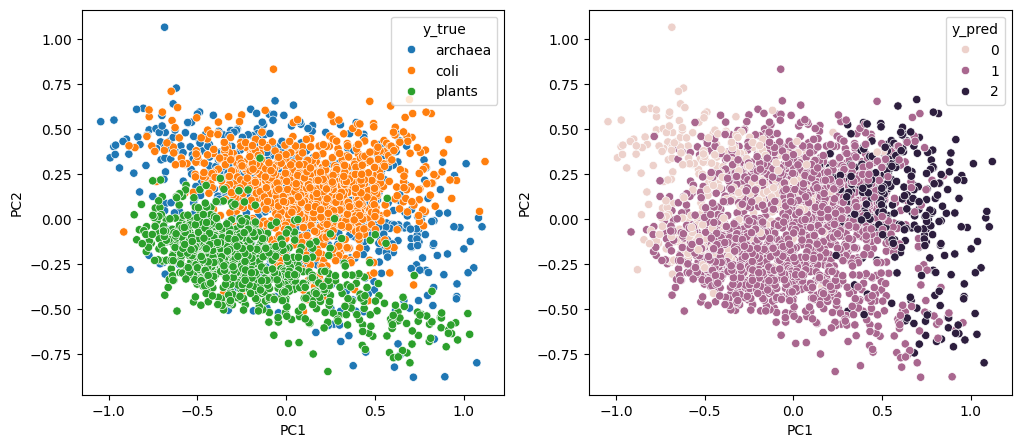

In [92]:
# Plot it!
plot_results(
    data=df_numeric,
    y_true=df["organism"],
    y_pred=kmeans(df_numeric)
)